In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd

In [34]:
def download_data(stock, start, end):
    data = {}
    ticker = yf.download(stock, start, end)
    data['price'] = ticker['Adj Close']
    return pd.DataFrame(data)

def plot_rsi(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['rsi'], label='RSI', color='tab:blue')
    plt.title('Relative Strength Indicator (RSI)')
    plt.xlabel('Date')
    plt.ylabel('Relative Strength (RSI)')
    plt.show()

[*********************100%***********************]  1 of 1 completed
                 price    return      move        up      down  average_gain  \
Date                                                                           
2015-01-22  118.127747  0.021466  2.508659  2.508659  0.000000      0.559285   
2015-01-23  118.492622  0.003084  0.364876  0.364876  0.000000      0.585347   
2015-01-26  118.865150  0.003139  0.372528  0.372528  0.000000      0.611956   
2015-01-27  116.820175 -0.017354 -2.044975  0.000000 -2.044975      0.611956   
2015-01-28  115.208549 -0.013892 -1.611626  0.000000 -1.611626      0.611956   
...                ...       ...       ...       ...       ...           ...   
2019-12-24  125.164146 -0.004214 -0.528557  0.000000 -0.528557      0.333159   
2019-12-26  125.099251 -0.000519 -0.064896  0.000000 -0.064896      0.333159   
2019-12-27  125.433052  0.002665  0.333801  0.333801  0.000000      0.270236   
2019-12-30  123.151955 -0.018353 -2.281097  0.00000

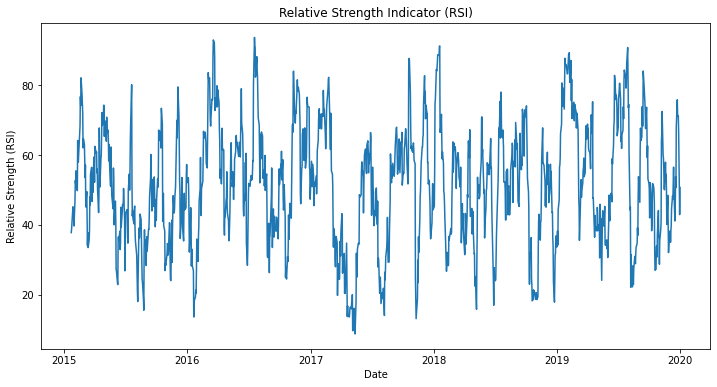

In [36]:
if __name__ == '__main__':

    start_date =  datetime.datetime(2015, 1, 1)
    end_date =  datetime.datetime(2020, 1, 1)
    
    stock_data = download_data('IBM', start_date, end_date)
    
    stock_data['return'] = np.log(stock_data['price'] / stock_data['price'].shift(1))
    stock_data['move'] = stock_data['price'] - stock_data['price'].shift(1)
    
    # average
    stock_data['up']   = np.where(stock_data['move'] > 0, stock_data['move'], 0)
    stock_data['down'] = np.where(stock_data['move'] < 0, stock_data['move'], 0)    
    
    # RSI
    stock_data['average_gain'] = stock_data['up'].rolling(14).mean()
    stock_data['average_loss'] = stock_data['down'].abs().rolling(14).mean()
    
    RS = stock_data['average_gain'] / stock_data['average_loss']
    
    stock_data['rsi'] = 100.0 - (100.0 / (1.0 + RS))
    
    stock_data =  stock_data.dropna()
    print(stock_data)
    
    plot_rsi(stock_data)